<a href="https://colab.research.google.com/github/mona-jha/cv-assignment/blob/main/anisotropic_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name :** Mona Kumari

**Roll No :** CS2311

**M.Tech CS 2nd Year**

# **Anisotropic Diffusion**

In [4]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def anisotropic_diffusion(image, num_iterations, kappa, gamma):
    """
    Perform anisotropic diffusion on an image.

    Parameters:
    - image: Input image (2D numpy array).
    - num_iterations: Number of iterations to perform.
    - kappa: Conduction coefficient, controls sensitivity to edges.
    - gamma: Controls the speed of diffusion.

    Returns:
    - diffused_image: The image after applying anisotropic diffusion.
    """
    # Initialize the diffused image and convert to float64
    diffused_image = image.astype(np.float64)

    for _ in range(num_iterations):
        # Compute gradients in four directions
        north = np.roll(diffused_image, -1, axis=0)
        south = np.roll(diffused_image, 1, axis=0)
        east = np.roll(diffused_image, -1, axis=1)
        west = np.roll(diffused_image, 1, axis=1)

        # Compute differences
        delta_north = north - diffused_image
        delta_south = south - diffused_image
        delta_east = east - diffused_image
        delta_west = west - diffused_image

        # Compute conduction coefficients
        c_north = np.exp(-(delta_north / kappa) ** 2)
        c_south = np.exp(-(delta_south / kappa) ** 2)
        c_east = np.exp(-(delta_east / kappa) ** 2)
        c_west = np.exp(-(delta_west / kappa) ** 2)

        # Update the image
        diffused_image += gamma * (
            c_north * delta_north +
            c_south * delta_south +
            c_east * delta_east +
            c_west * delta_west
        )

    return diffused_image.astype(np.uint8)



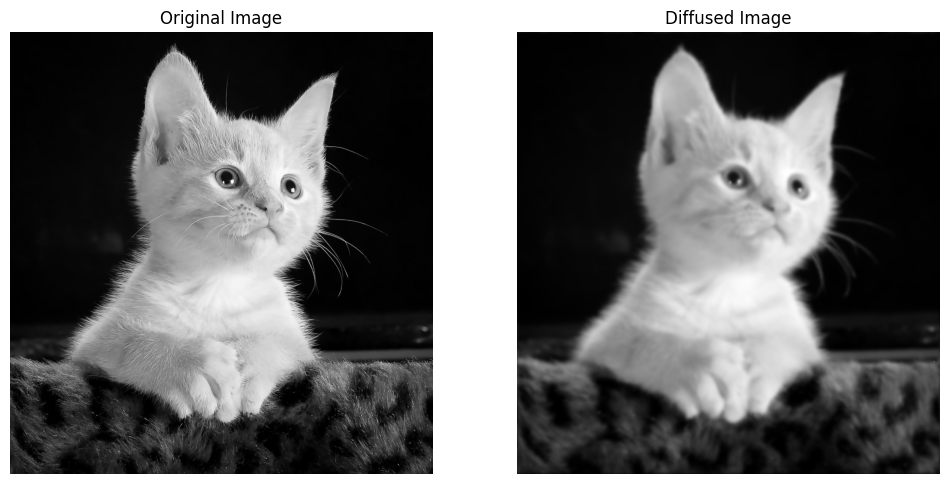

In [7]:
# Read the image
file_path = '/content/cat.jpg'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Apply anisotropic diffusion
num_iterations = 100
kappa = 80
gamma = 0.1
diffused_image = anisotropic_diffusion(image, num_iterations, kappa, gamma)

# Display the original and diffused images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Diffused Image')
plt.imshow(diffused_image, cmap='gray')
plt.axis('off')

plt.show()

End

---